# Pendahuluan

*   Nama    = Yandiyan
*   Email   = yandiyan10@gmail.com
*   Dataset = [Stock Market Dataset](https://www.kaggle.com/datasets/s3programmer/stock-market-dataset-for-predictive-analysis/data)

---





## Problem Definition


### Latar Belakang
Pasar saham merupakan salah satu indikator penting dalam kesehatan ekonomi suatu negara. Investor, analis keuangan, dan lembaga keuangan secara aktif memantau pergerakan harga saham untuk membuat keputusan strategis. Namun, karena sifat pasar saham yang dinamis dan kompleks, dibutuhkan pendekatan berbasis data untuk memahami dan memprediksi tren harga saham secara lebih akurat.

Dengan kemajuan dalam bidang machine learning, kini memungkinkan untuk membangun model prediktif yang dapat memperkirakan pergerakan harga saham berdasarkan data historis. Model ini dapat membantu investor dalam membuat keputusan investasi yang lebih terinformasi dan strategis.

### Tujuan Proyek
Tujuan dari proyek ini adalah membangun model machine learning yang dapat memprediksi harga penutupan (closing price) saham berdasarkan data historis dan fitur-fitur teknikal lainnya.

### Statement Masalah
1. Bagaimana cara memprediksi harga penutupan saham berdasarkan data historis dan indikator teknikal?

2. Algoritma machine learning apa yang memberikan hasil terbaik untuk prediksi harga saham pada dataset ini?

### Solution Statement
Untuk menyelesaikan permasalahan ini, pendekatan yang digunakan meliputi:

- Baseline Model: Linear Regression — untuk mendapatkan acuan performa awal.

- Model Lanjutan: Random Forest dan XGBoost — untuk menangkap pola non-linear dan kompleksitas lebih tinggi.

- Melakukan hyperparameter tuning dan evaluasi dengan metrik yang tepat.

### Metrik Evaluasi
Model akan dievaluasi menggunakan metrik berikut:

- RMSE (Root Mean Squared Error): mengukur rata-rata kesalahan dalam satuan yang sama dengan target.

- MAE (Mean Absolute Error): memberikan gambaran rata-rata kesalahan absolut.

- R² Score (Coefficient of Determination): mengukur seberapa baik variansi target dapat dijelaskan oleh model.

### Referensi Akademik yang Relevan
Untuk mendukung pendekatan dan meningkatkan kredibilitas proyek, berikut beberapa referensi akademik yang dapat Anda sertakan:

1. Hyperparameter Optimization for Forecasting Stock Returns
Studi ini menekankan pentingnya optimasi hyperparameter dalam model prediksi saham, menunjukkan bahwa tuning dapat meningkatkan performa model secara signifikan.

https://arxiv.org/abs/2001.10278

2. Impact of Hyperparameter Tuning on Machine Learning Models in Stock Price Forecasting
Penelitian ini membahas bagaimana tuning hyperparameter mempengaruhi kinerja model machine learning dalam prediksi harga saham.

https://link.springer.com/chapter/10.1007/978-981-19-5545-9_5

3. Hyperparameter Optimization: Foundations, Algorithms, Best Practices and Open Challenges
Makalah ini memberikan tinjauan menyeluruh tentang metode optimasi hyperparameter, termasuk praktik terbaik dan tantangan yang dihadapi.

https://arxiv.org/abs/2107.05847


# Import Library
Seluruh library yang digunakan dalam proyek ini diimpor di awal agar proses eksplorasi, pemodelan, dan evaluasi dapat dilakukan secara efisien. Komponen utama mencakup: manipulasi data (pandas, numpy), visualisasi (matplotlib, seaborn, plotly), pemodelan (sklearn, xgboost), serta evaluasi dan penyimpanan model (joblib).

In [1]:
# install library tambahan
!pip install -q seaborn plotly xgboost

# import library untuk manipulasi data
import pandas as pd
import numpy as np

# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import library untuk preprocessing data
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import library untuk pemodelan
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# import library untuk evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import untuk menyimpan model
import joblib

# import untuk manipulasi file dan path
import os
from zipfile import ZipFile

# pengaturan visualisasi
plt.style.use('ggplot')
sns.set_palette('pastel')

# tampilkan semua kolom saat melihat dataframe
pd.set_option('display.max_columns', None)

# Data Collection

Dataset proyek ini disimpan dalam Google Drive. Oleh karena itu, perlu dilakukan mounting dan ekstraksi file sebelum proses analisis dimulai. File yang digunakan adalah dataset pasar saham historis dengan berbagai fitur teknikal.

## Import from Drive

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# path file zip
zip_path = '/content/drive/MyDrive/Project/Dicoding/Stock Market Dataset for Predictive Analytics/archive (5).zip'
extract_path = '/content/drive/MyDrive/Project/Dicoding/Stock Market Dataset for Predictive Analytics/data'

# extract file zip
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# tampilkan daftar file hasil ekstraksi
os.listdir(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['stock_market_data_large.csv']

In [3]:
# set path dataset
csv_path = '/content/drive/MyDrive/Project/Dicoding/Stock Market Dataset for Predictive Analytics/data/stock_market_data_large.csv'

# load dataset
df = pd.read_csv(csv_path)

# tampilkan 5 data teratas
df.head()

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target
0,2010-01-01,100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089,0
1,2010-01-04,101.147509,101.681257,99.244474,100.396541,2693069,81.444127,-0.078559,0.751219,1
2,2010-01-05,101.567491,103.949668,101.509347,103.012156,3027306,71.544018,0.069441,0.979723,1
3,2010-01-06,104.247814,106.652559,102.760082,105.846343,4341338,73.683548,0.410693,-0.858008,0
4,2010-01-07,105.339440,105.983592,103.517541,104.721465,2106182,72.675179,0.583641,0.264456,0


# Data Understanding

Pada tahap ini, dilakukan eksplorasi awal terhadap dataset saham yang akan digunakan untuk membangun model prediksi harga penutupan (close price).

Dataset berasal dari Kaggle dan mencakup berbagai informasi historis per saham seperti harga pembukaan (open), tertinggi (high), terendah (low), volume transaksi, dan harga penutupan (close).

- Nama File: stock_market_data_large.csv
- Tujuan Utama: Memahami struktur data, distribusi fitur, dan potensi korelasi antar variabel sebelum memasuki tahap pemodelan prediktif.

## Infromasi Umum

In [4]:
# tampilkan 5 baris pertama
print("preview data:")
display(df.head())

# dimensi data
print(f"\ndataset shape: {df.shape}")

# info kolom dan tipe data
print("\ninfo dataset:")
df.info()

# statistik deskriptif
print("\nstatistik deskriptif:")
display(df.describe(include='all'))

# cek missing values
print("\njumlah missing values per kolom:")
print(df.isnull().sum())

preview data:


,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target
0,2010-01-01,100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089,0
1,2010-01-04,101.147509,101.681257,99.244474,100.396541,2693069,81.444127,-0.078559,0.751219,1
2,2010-01-05,101.567491,103.949668,101.509347,103.012156,3027306,71.544018,0.069441,0.979723,1
3,2010-01-06,104.247814,106.652559,102.760082,105.846343,4341338,73.683548,0.410693,-0.858008,0
4,2010-01-07,105.339440,105.983592,103.517541,104.721465,2106182,72.675179,0.583641,0.264456,0



dataset shape: (13647, 10)

info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647 entries, 0 to 13646
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13647 non-null  object 
 1   Open       13647 non-null  float64
 2   High       13647 non-null  float64
 3   Low        13647 non-null  float64
 4   Close      13647 non-null  float64
 5   Volume     13647 non-null  int64  
 6   RSI        13647 non-null  float64
 7   MACD       13647 non-null  float64
 8   Sentiment  13647 non-null  float64
 9   Target     13647 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB

statistik deskriptif:


,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target
count,13647,13647.000000,13647.000000,13647.000000,13647.000000,1.364700e+04,13647.000000,13647.000000,13647.000000,13647.000000
unique,13647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2062-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.096760,102.600108,99.599301,101.096959,2.563550e+06,49.906274,-0.026986,-0.001146,0.500916
std,NaN,101.152616,101.177291,101.162439,101.159203,1.404601e+06,15.040947,2.203216,0.573574,0.500017
min,NaN,-57.993581,-56.565948,-60.262371,-58.538240,1.003100e+05,0.000000,-7.384103,-0.999338,0.000000
25%,NaN,16.763759,18.101178,15.121420,16.711654,1.356426e+06,39.576585,-1.472511,-0.499346,0.000000
50%,NaN,75.232057,76.765118,73.833890,75.271538,2.550567e+06,49.911584,0.012284,0.003138,1.000000
75%,NaN,171.281978,172.948561,169.665120,171.278812,3.779358e+06,60.220491,1.416378,0.491161,1.000000



jumlah missing values per kolom:
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
RSI          0
MACD         0
Sentiment    0
Target       0
dtype: int64


Dataset ini berisi lebih dari 13.000 entri harian pasar saham dengan fitur harga pasar (open, high, low, close), volume perdagangan, dan indikator teknikal seperti RSI, MACD, serta sentimen pasar. Tujuan dari analisis ini adalah membangun model prediksi untuk memproyeksikan harga penutupan (Close) saham secara regresi.

---

### Informasi Umum Dataset
- **Jumlah Data:** 13.647 baris  
- **Jumlah Kolom:** 10 kolom  
- **Target Prediksi:** `Close`  
- **Tipe Prediksi:** Regresi kontinu (angka)  
- **Distribusi Waktu:** Data harian, dimulai sejak tahun 2010  

---

### Daftar Kolom

| Nama Kolom | Deskripsi |
|------------|-----------|
| `Date`     | Tanggal pencatatan data |
| `Open`     | Harga pembukaan |
| `High`     | Harga tertinggi hari itu |
| `Low`      | Harga terendah hari itu |
| `Close`    | Harga penutupan (**target**) |
| `Volume`   | Volume perdagangan |
| `RSI`      | Relative Strength Index |
| `MACD`     | Moving Average Convergence Divergence |
| `Sentiment`| Skor sentimen pasar |
| `Target`   | Klasifikasi biner *(tidak digunakan dalam regresi)* |

---
### Statistik Deskriptif
| Fitur     | Rata-rata | Min   | Max  | Catatan                        |
| --------- | --------- | ----- | ---- | ------------------------------ |
| Open      | 101.10    | -58   | 323  | Terdapat anomali nilai negatif |
| Close     | 101.10    | -58   | 324  | Target prediksi                |
| Volume    | 2.56M     | 100k  | 5M   | Skew ke kanan                  |
| RSI       | 49.91     | 0     | 97.6 | Rentang normal (0–100)         |
| MACD      | -0.026    | -7.38 | 7.29 | Beberapa nilai ekstrim         |
| Sentiment | -0.001    | -0.99 | 0.99 | Skor sudah dinormalisasi       |

---
### Insight Awal
- Tidak ditemukan missing values di seluruh kolom.
- Kolom Close cukup seimbang dalam range data — namun ada nilai negatif yang perlu ditelusuri (harga < 0 tidak logis).
- Beberapa fitur seperti Volume, MACD, dan Close memiliki outlier atau skewness.
---

## Exploratory Data Analysis
EDA dilakukan untuk menemukan pola, anomali, outlier, dan distribusi data. Visualisasi seperti histogram, pairplot, heatmap korelasi, dan plot distribusi residual digunakan untuk memperdalam pemahaman terhadap data.

In [5]:
# pastikan folder vis sudah ada
vis_path = '/content/drive/MyDrive/Project/Dicoding/Stock Market Dataset for Predictive Analytics/vis'
os.makedirs(vis_path, exist_ok=True)

# ubah kolom tanggal
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# fitur numerik
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'Sentiment']

# set tema visual
sns.set(style='whitegrid')
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

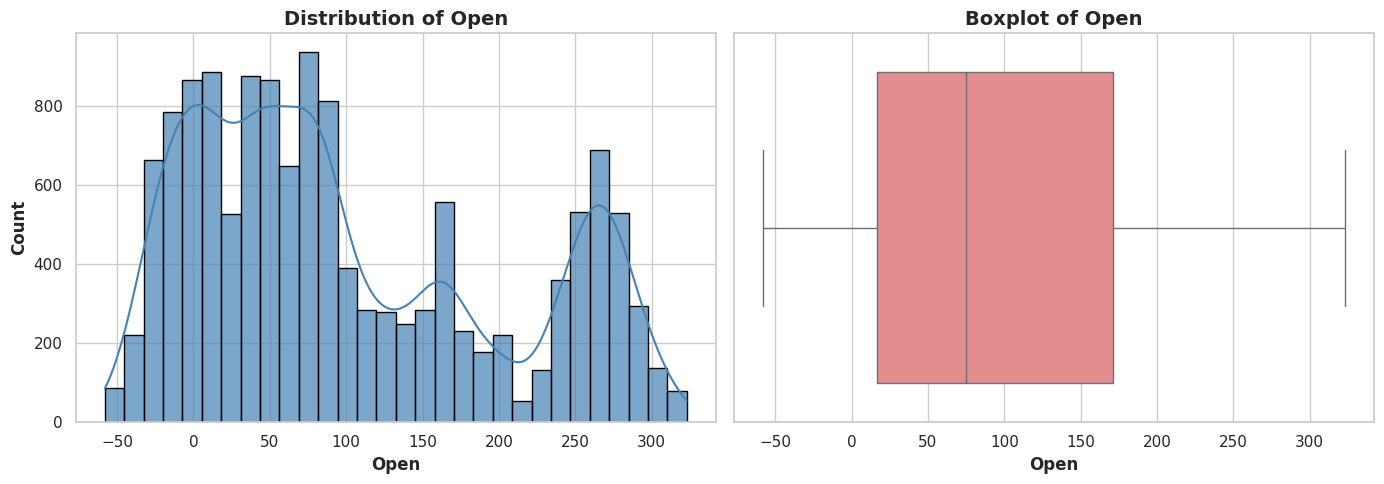

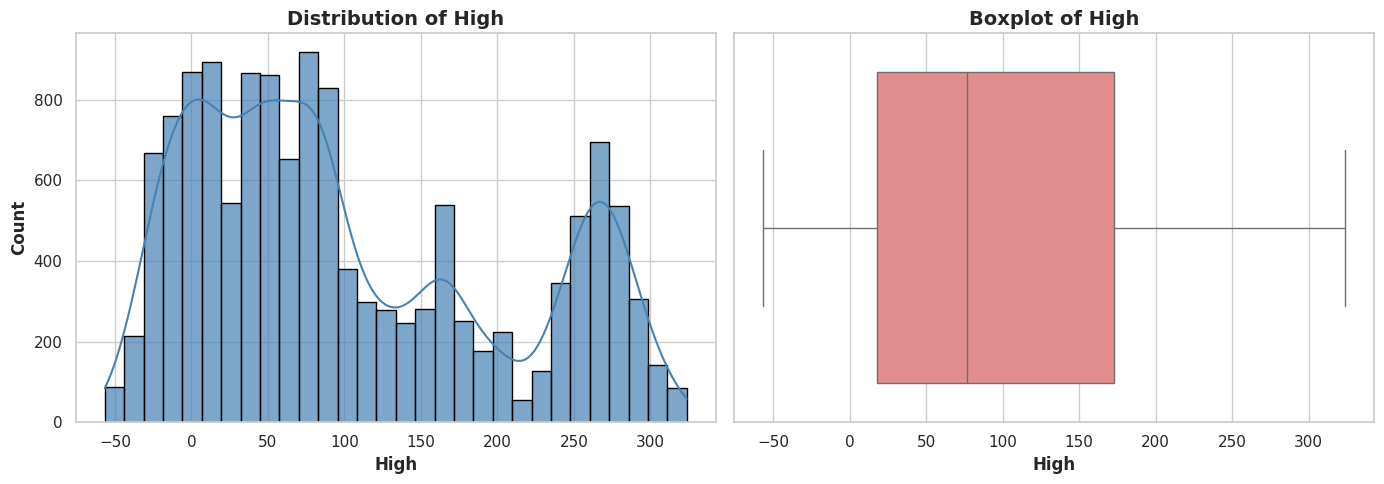

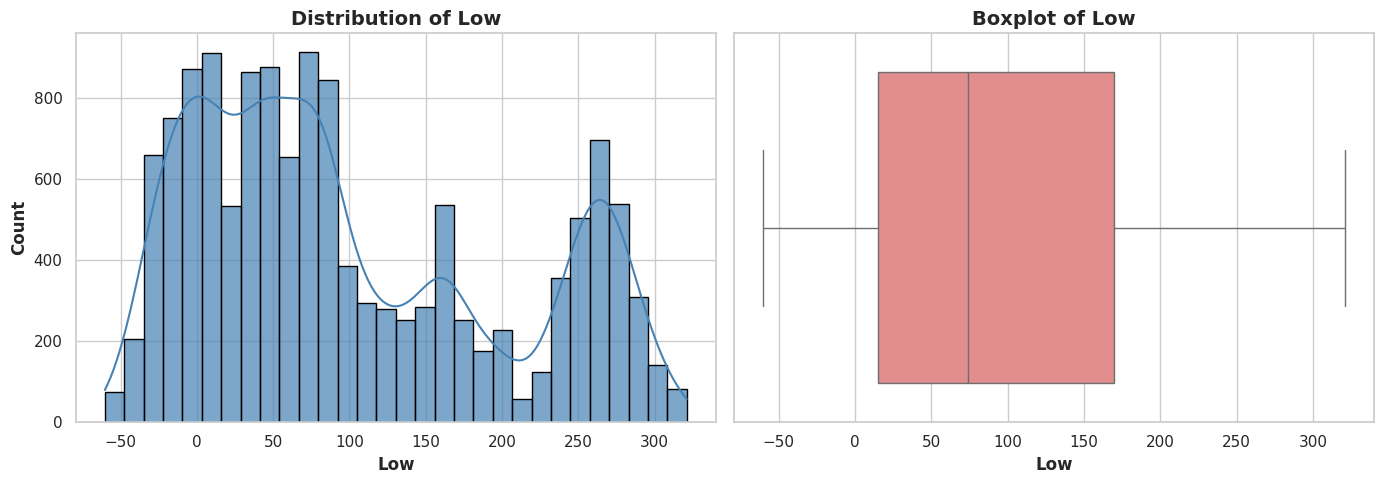

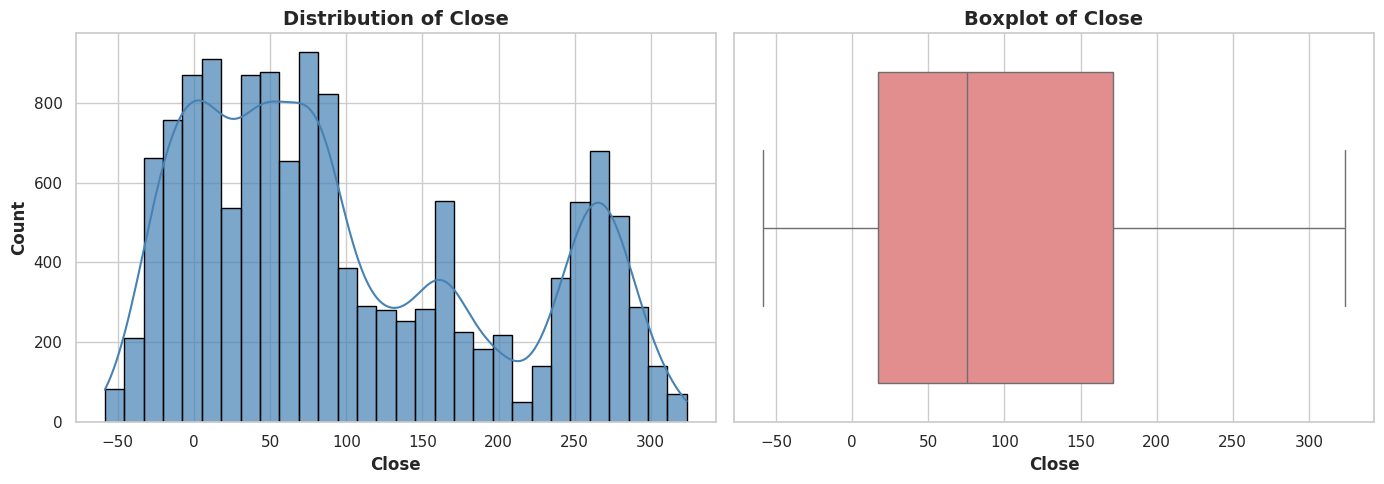

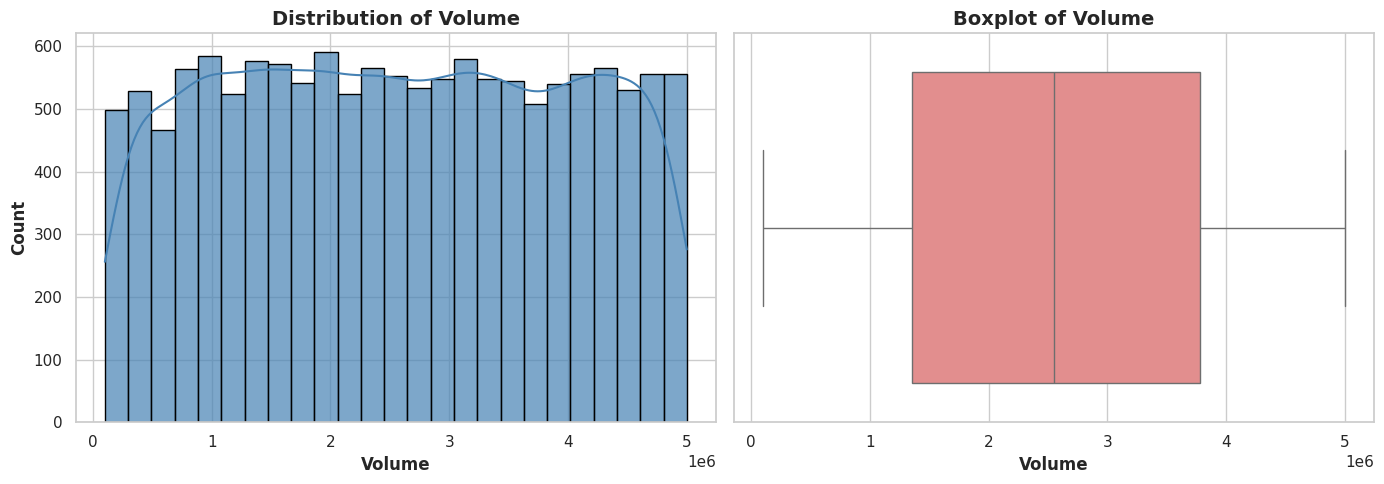

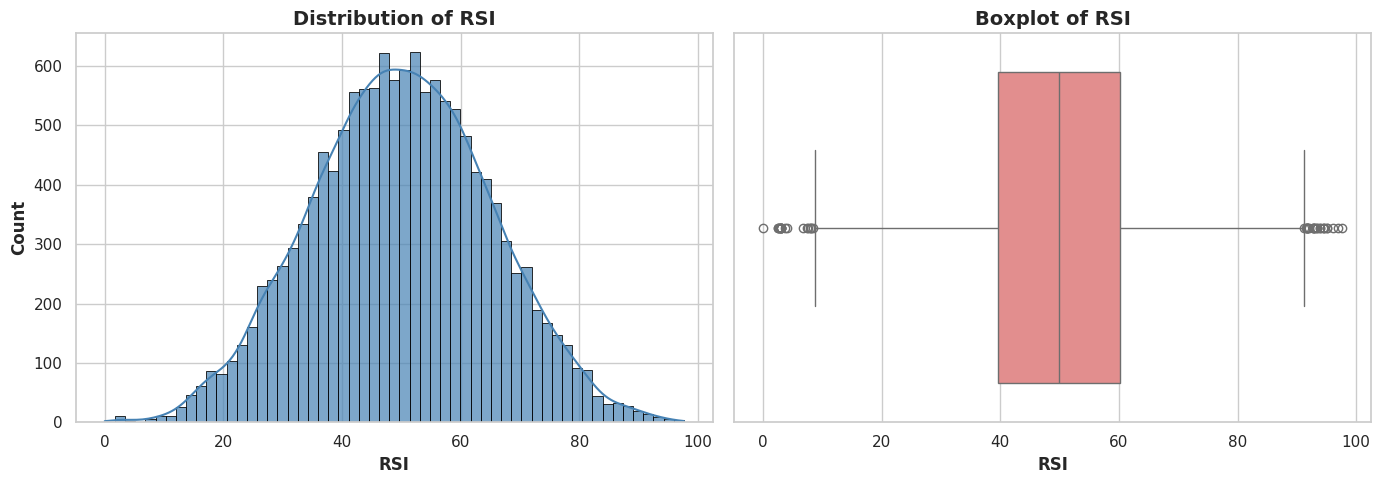

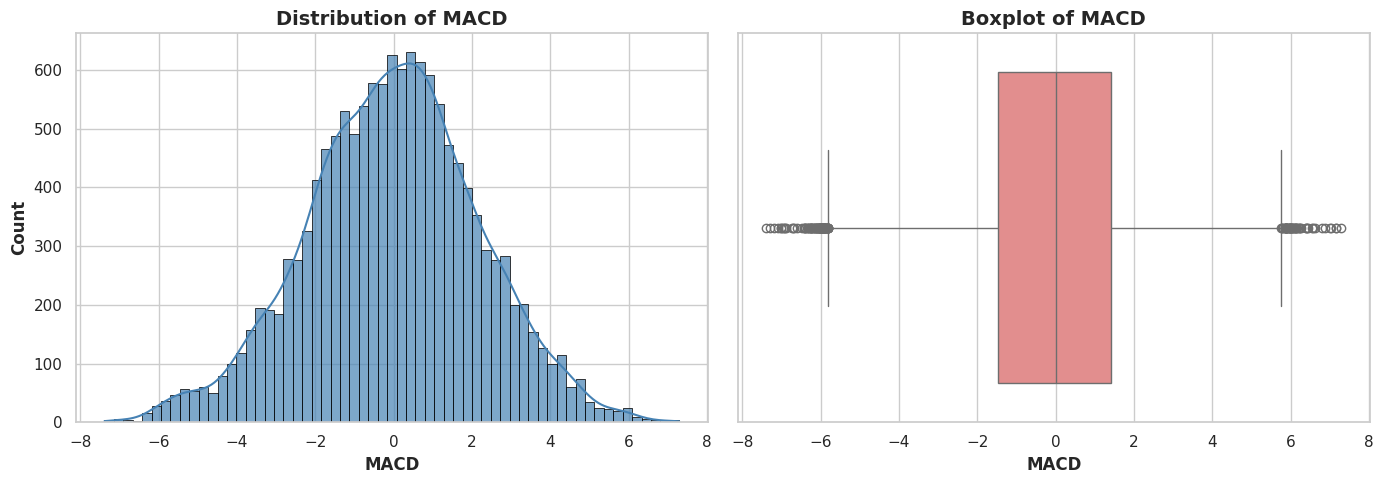

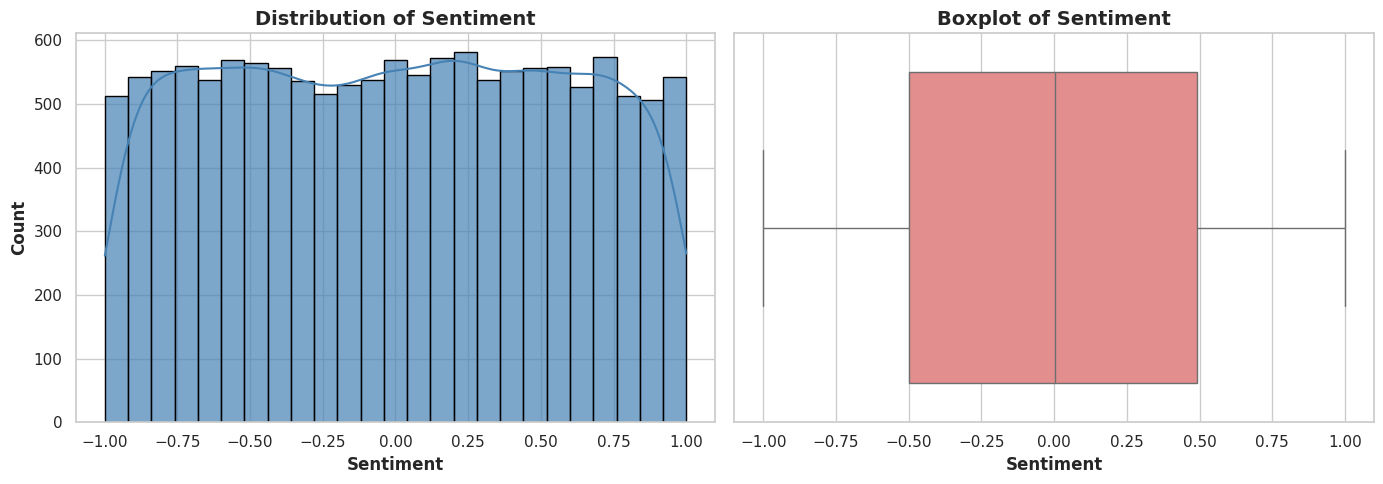

In [6]:
# histogram dan boxplot
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(df[col], kde=True, ax=axes[0], color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)

    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    fig.savefig(f'{vis_path}/dist_boxplot_{col.lower()}.png')
    plt.show()

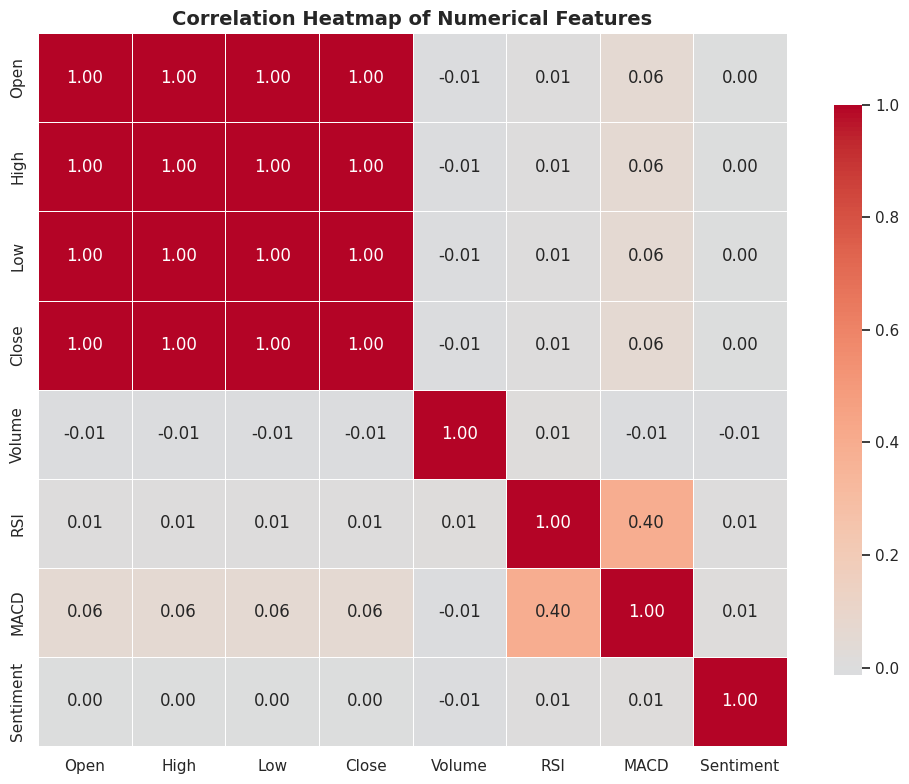

In [7]:
# heatmap korelasi
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig(f'{vis_path}/correlation_heatmap.png')
plt.show()

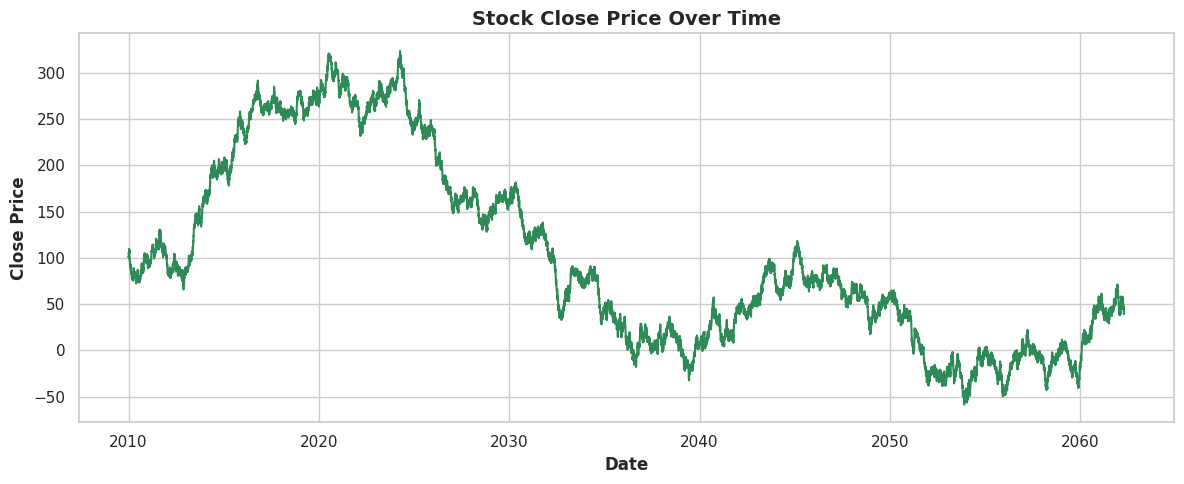

In [8]:
# tren harga penutupan
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Close', data=df, color='seagreen')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.savefig(f'{vis_path}/close_price_trend.png')
plt.show()

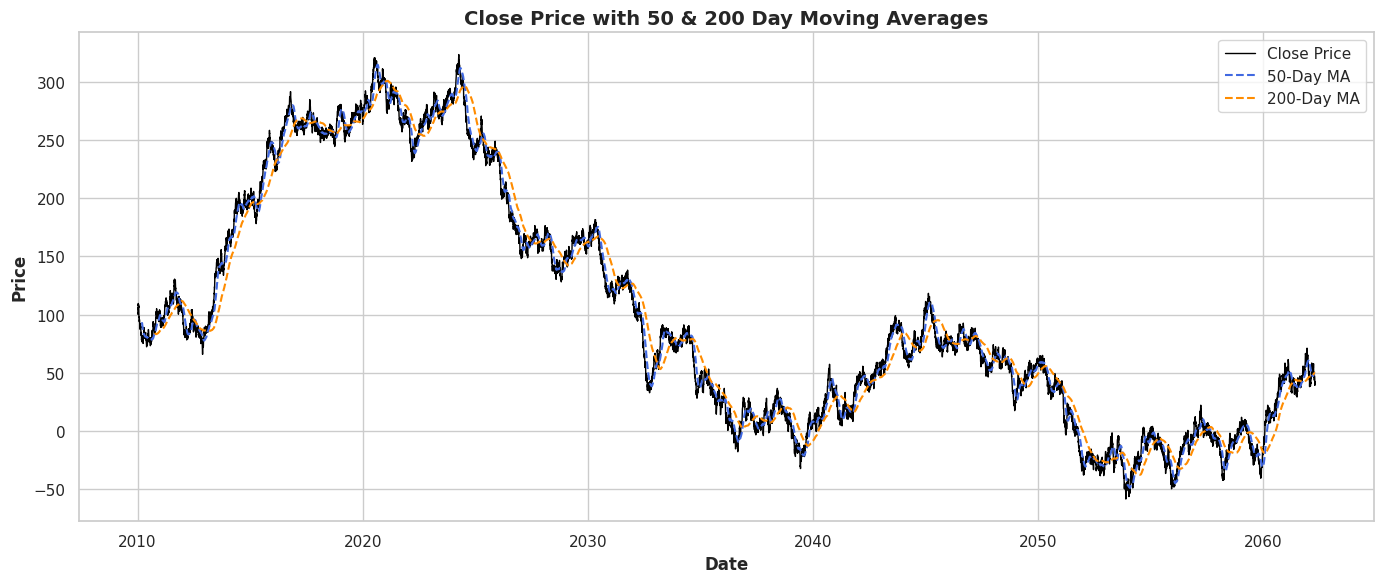

In [9]:
# hitung moving average
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# plot close + moving averages
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='black', linewidth=1)
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', color='royalblue', linestyle='--')
plt.plot(df['Date'], df['MA_200'], label='200-Day MA', color='darkorange', linestyle='--')
plt.title('Close Price with 50 & 200 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.savefig(f'{vis_path}/moving_average_trend.png')
plt.show()

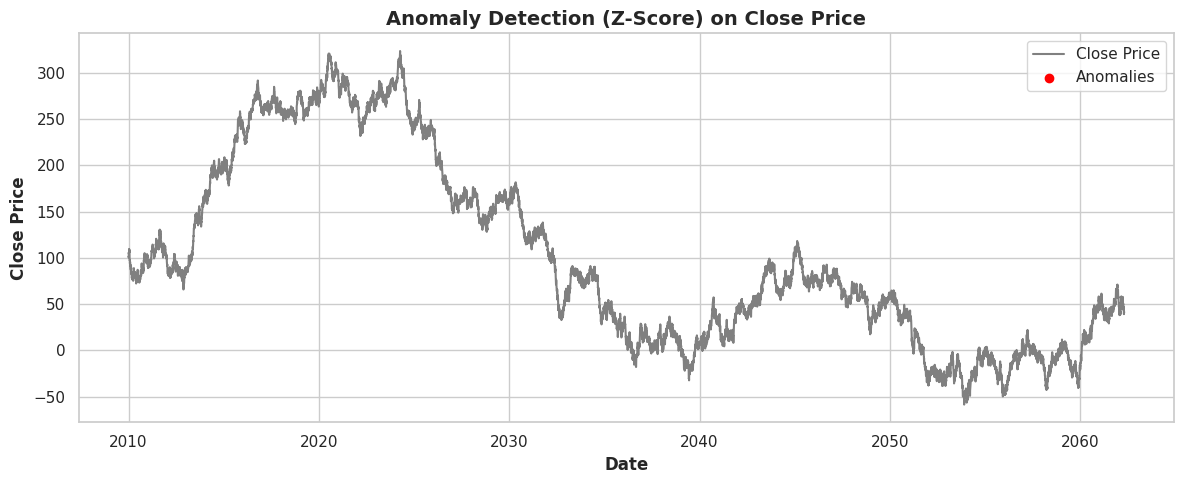

In [10]:
# anomaly detection (Z-score)
df['z_close'] = zscore(df['Close'])
anomalies = df[np.abs(df['z_close']) > 3]

plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Close', data=df, color='gray', label='Close Price')
plt.scatter(anomalies['Date'], anomalies['Close'], color='red', label='Anomalies', zorder=5)
plt.title('Anomaly Detection (Z-Score) on Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.savefig(f'{vis_path}/anomaly_zscore_close.png')
plt.show()

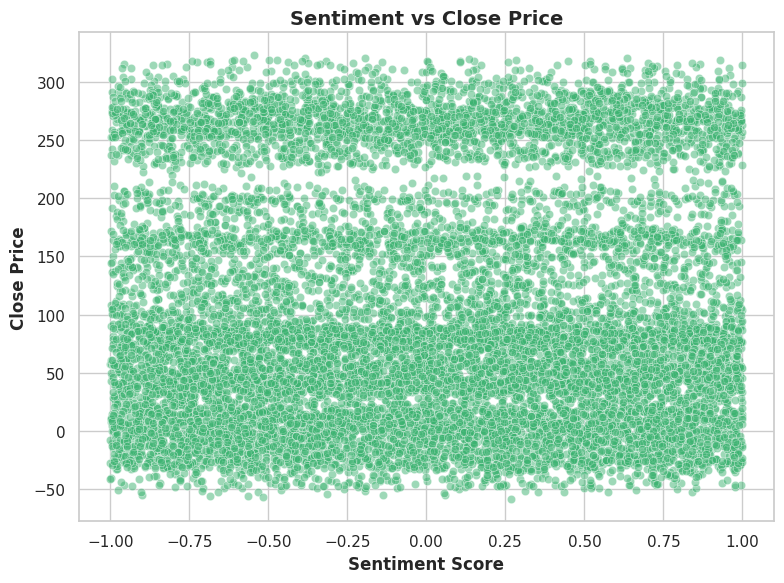

In [11]:
# scatter: Sentiment vs Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sentiment', y='Close', data=df, alpha=0.5, color='mediumseagreen')
plt.title('Sentiment vs Close Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Close Price')
plt.tight_layout()
plt.savefig(f'{vis_path}/scatter_sentiment_close.png')
plt.show()

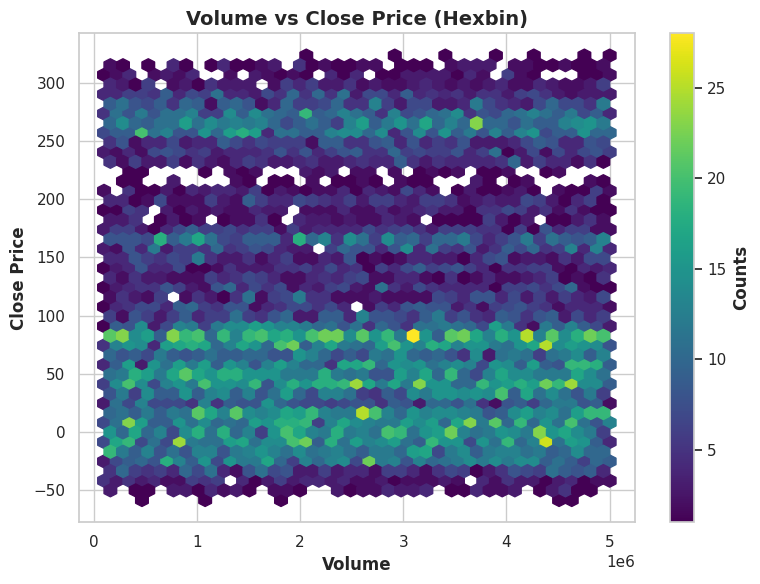

In [12]:
# hexbin: Volume vs Close
plt.figure(figsize=(8, 6))
plt.hexbin(df['Volume'], df['Close'], gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(label='Counts')
plt.title('Volume vs Close Price (Hexbin)')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.tight_layout()
plt.savefig(f'{vis_path}/hexbin_volume_close.png')
plt.show()

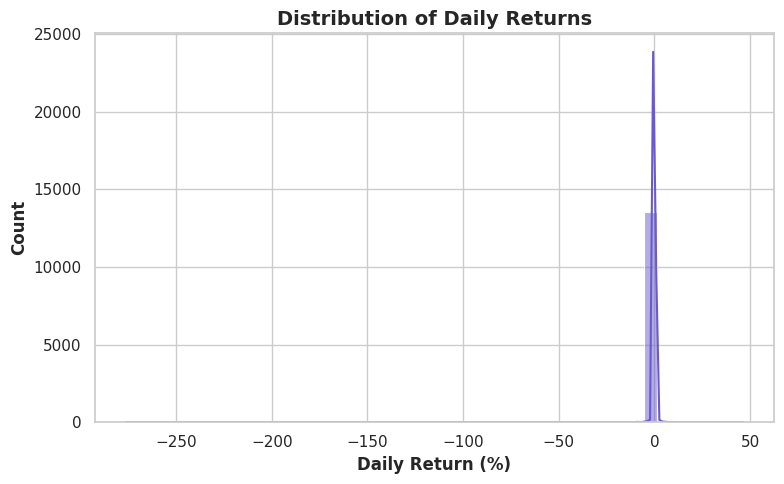

In [13]:
# distribusi return harian
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(8, 5))
sns.histplot(df['Daily Return'].dropna(), kde=True, bins=50, color='slateblue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.tight_layout()
plt.savefig(f'{vis_path}/hist_daily_return.png')
plt.show()

## Exploratory Data Analysis (EDA) Insight

---

### Korelasi Antar Fitur Numerik

- Fitur **Open, High, Low, dan Close** memiliki korelasi sempurna (1.00), menunjukkan bahwa keempat harga ini saling linear dan bergerak bersama.
- **Volume** dan **Sentiment** tidak memiliki korelasi signifikan terhadap fitur harga (nilai mendekati 0).
- **RSI** dan **MACD** memiliki korelasi sedang (0.40), yang mencerminkan hubungan yang cukup kuat di antara dua indikator teknikal ini.

---

### Harga Penutupan dengan Moving Averages

- Garis hitam menunjukkan harga penutupan aktual (`Close Price`), sedangkan garis biru dan oranye menunjukkan moving average 50 dan 200 hari.
- Terlihat bahwa tren jangka pendek (50 hari) dan jangka panjang (200 hari) mengikuti pola umum harga namun menghaluskan fluktuasi jangka pendek.
- Terdapat periode tren naik tajam (sekitar 2013–2023), diikuti dengan penurunan yang konsisten setelahnya.

---

### Deteksi Anomali dengan Z-Score

- Titik merah menandakan **anomali statistik** yang terdeteksi berdasarkan nilai Z-Score.
- Anomali cenderung muncul saat terdapat lonjakan atau penurunan drastis harga dalam waktu singkat.
- Deteksi ini bisa berguna untuk identifikasi momen **overreaction pasar atau noise ekstrem**.

---

### Sentiment vs Close Price

- Scatter plot menunjukkan **tidak adanya pola jelas** antara `Sentiment Score` dan `Close Price`.
- Korelasi yang sangat lemah (seperti ditunjukkan dalam heatmap sebelumnya) mengindikasikan bahwa fitur `Sentiment` mungkin **tidak relevan untuk prediksi regresi harga**.

---

### Volume vs Close Price (Hexbin Plot)


- Hexbin plot menunjukkan kepadatan observasi antara `Volume` dan `Close Price`.
- Seperti grafik scatter sebelumnya, **tidak ada pola linear atau non-linear yang kuat**.
- Sebagian besar data berkumpul di area volume menengah dan harga penutupan 0–150, namun tetap tersebar luas.

---

### Distribusi Daily Return

- Distribusi return harian sangat **terpusat di sekitar 0%**, mengindikasikan bahwa pergerakan harga harian mayoritas kecil.
- Beberapa outlier dengan nilai return ekstrem menunjukkan volatilitas tinggi pada beberapa titik waktu.
- Pola ini umum dalam data pasar saham dan relevan untuk model yang mempertimbangkan risiko.

---

### Kesimpulan Umum dari EDA

- Harga historis (Open, High, Low, Close) sangat berkorelasi dan menjadi prediktor kuat untuk Close.
- Indikator teknikal seperti RSI & MACD bisa menjadi fitur tambahan yang berguna.
- Fitur seperti `Sentiment` dan `Volume` menunjukkan kontribusi rendah terhadap harga.
- Moving average dan Z-score membantu memahami tren dan mendeteksi outlier harga.
- Data bersifat **linear dan relatif bersih**, cocok untuk pendekatan regresi linier sederhana.
---

## VIF dan PCA
VIF (Variance Inflation Factor) digunakan untuk mendeteksi multikolinearitas antar fitur.

PCA (Principal Component Analysis) digunakan sebagai teknik reduksi dimensi dan untuk memahami representasi utama data numerik terhadap variansi yang diwakili.

In [14]:
# buat salinan data bersih
df_clean = df.dropna(subset=['Daily Return']).copy()

# fitur numerik untuk analisis VIF dan PCA
features_for_vif = ['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD', 'Sentiment', 'Daily Return']

# scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features_for_vif])
X_df = pd.DataFrame(X_scaled, columns=features_for_vif)

# hitung VIF
vif_data = pd.DataFrame()
vif_data['feature'] = features_for_vif
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
display(vif_data)

,feature,VIF
0,Open,20526.956485
1,High,20468.736438
2,Low,20595.434018
3,Volume,1.000654
4,RSI,1.189508
5,MACD,1.193687
6,Sentiment,1.000561
7,Daily Return,1.000650


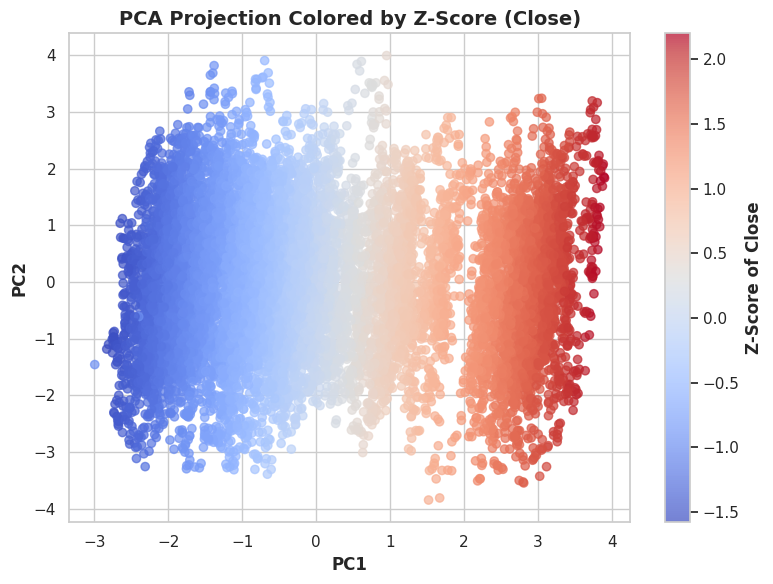

In [15]:
# PCA untuk reduksi dimensi
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_clean['PC1'] = components[:, 0]
df_clean['PC2'] = components[:, 1]

# visualisasi PCA
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_clean['PC1'], df_clean['PC2'], c=df_clean['z_close'],
                 cmap='coolwarm', alpha=0.7)
plt.colorbar(sc, label='Z-Score of Close')
plt.title('PCA Projection Colored by Z-Score (Close)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig(f'{vis_path}/pca_projection_zscore.png')
plt.show()

## Insight Multikolinearitas & PCA

---

### Variance Inflation Factor (VIF)

- **Open, High, dan Low** memiliki nilai VIF yang **sangat tinggi** (> 20.000), menandakan adanya **multikolinearitas ekstrem** di antara ketiganya.
- Hal ini sejalan dengan hasil heatmap korelasi sebelumnya (nilai korelasi = 1.00 antar harga).
- Multikolinearitas tinggi bisa menyebabkan **ketidakstabilan pada model linier**, karena sulit membedakan kontribusi masing-masing fitur terhadap target.
- Fitur lain seperti **Volume, RSI, MACD, Sentiment, dan Daily Return** memiliki VIF < 2, yang aman dan tidak menimbulkan kekhawatiran multikolinearitas.

**Rekomendasi**:  
Pertimbangkan untuk **menghapus salah satu dari fitur harga** (misalnya hanya gunakan `Close` atau `Open`) untuk menjaga stabilitas model regresi.

---

### PCA Projection (Colored by Z-Score of Close)

- Visualisasi PCA menunjukkan representasi 2 dimensi dari data setelah direduksi menggunakan **Principal Component Analysis**.
- Warna menunjukkan nilai **Z-score dari `Close` price**, dari biru (rendah) ke merah (tinggi).
- Distribusi data tampak **terpisah dengan gradasi warna yang mulus** dari kiri ke kanan (PC1), menandakan bahwa **komponen utama pertama (PC1)** berhasil menangkap variasi utama terkait harga `Close`.
- Ini mengindikasikan bahwa **dimensi utama yang diturunkan melalui PCA secara efektif merepresentasikan informasi penting** yang berkaitan dengan target prediksi (`Close`).

**Interpretasi Tambahan**:
- Proyeksi ini menunjukkan **struktur linier dan bersih** pada data, mendukung hasil sebelumnya bahwa regresi linier cocok digunakan.
- PCA juga bermanfaat untuk **visualisasi dan deteksi anomali**, karena outlier cenderung muncul di ujung spektrum proyeksi.

---

### Ringkasan Insight

- Terdapat **masalah multikolinearitas serius** antar harga historis (`Open`, `High`, `Low`, `Close`) → perlu reduksi fitur.
- PCA menunjukkan bahwa data dapat direduksi secara efisien ke dalam dimensi yang menangkap variansi target secara baik.
- **Model linier dengan fitur yang disederhanakan** (tanpa multikolinearitas) sangat cocok untuk digunakan dalam kasus ini.


# Data Preparation
Tahap ini mencakup pembersihan dan transformasi data agar siap digunakan untuk pemodelan:

- Pembuangan fitur dengan VIF sangat tinggi

- Feature engineering (persentase perubahan, indikator teknikal)

- Normalisasi menggunakan StandardScaler

- Split data menjadi training dan testing dengan prinsip time-series aware (tanpa data leakage)

In [16]:
# salin data asli
df_prep = df.copy()

# drop kolom multikolinear & tidak dipakai
df_prep.drop(['High', 'Low', 'Target'], axis=1, inplace=True)

# fitur derivatif teknikal
df_prep['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100
df_prep['CHG_PCT'] = (df['Close'] - df['Open']) / df['Open'] * 100

# fitur waktu
df_prep['Year'] = df_prep['Date'].dt.year
df_prep['Month'] = df_prep['Date'].dt.month
df_prep['Day'] = df_prep['Date'].dt.day
df_prep['Weekday'] = df_prep['Date'].dt.weekday

# tentukan fitur dan target
target_col = 'Close'
feature_cols = [
    'Open', 'Volume', 'RSI', 'MACD', 'Sentiment', 'Daily Return',
    'HL_PCT', 'CHG_PCT', 'Year', 'Month', 'Day', 'Weekday'
]

# buang NA hasil rolling/pct_change
df_model = df_prep.dropna(subset=feature_cols + [target_col]).copy()

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model[feature_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols, index=df_model.index)

# gabungkan dengan target & date
df_final = X_scaled_df.copy()
df_final['Close'] = df_model['Close'].values
df_final['Date'] = df_model['Date'].values

# split berdasarkan waktu (80:20)
split_index = int(len(df_final) * 0.8)
train = df_final.iloc[:split_index]
test = df_final.iloc[split_index:]

# preview hasil akhir
train.head()

,Open,Volume,RSI,MACD,Sentiment,Daily Return,HL_PCT,CHG_PCT,Year,Month,Day,Weekday,Close,Date
1,0.000501,0.092121,2.097156,-0.023407,1.311722,0.012759,-0.000747,0.009458,-1.699357,-1.592421,-1.332782,-1.414058,100.396541,2010-01-04
2,0.004653,0.330095,1.438873,0.043767,1.710109,0.024864,-0.000898,0.010573,-1.699357,-1.592421,-1.219115,-0.706977,103.012156,2010-01-05
3,0.031151,1.265672,1.581136,0.198655,-1.493891,0.025358,0.002493,0.010631,-1.699357,-1.592421,-1.105448,0.000104,105.846343,2010-01-06
4,0.041943,-0.325736,1.514087,0.277153,0.463074,0.012450,-0.000935,0.009538,-1.699357,-1.592421,-0.991781,0.707185,104.721465,2010-01-07
5,0.025801,0.800808,0.835556,0.324185,-0.107964,0.015025,0.000744,0.010187,-1.699357,-1.592421,-0.878115,1.414265,104.405219,2010-01-08


# Modeling
Tahap modeling merupakan inti dari proyek machine learning. Di sinilah algoritma digunakan untuk mempelajari pola dari data dan membuat prediksi terhadap data yang belum pernah dilihat sebelumnya.

In [17]:
# fitur & target
X_train = train.drop(['Close', 'Date'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close', 'Date'], axis=1)
y_test = test['Close']

# simpan hasil evaluasi
results = {}

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}

# 2. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# 3. XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
results['XGBoost'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'R2': r2_score(y_test, y_pred_xgb)
}

# tampilkan hasil
pd.DataFrame(results).T

,RMSE,MAE,R2
Linear Regression,0.812484,0.661725,0.999101
Random Forest,4.362086,1.677538,0.974076
XGBoost,7.348605,3.711179,0.926426


## Visualisasi

Visualisasi dilakukan untuk menampilkan hasil prediksi dari model terhadap nilai aktual. Ini membantu dalam memahami kesesuaian model dengan data nyata, baik dari segi arah tren maupun kesalahan prediksi.

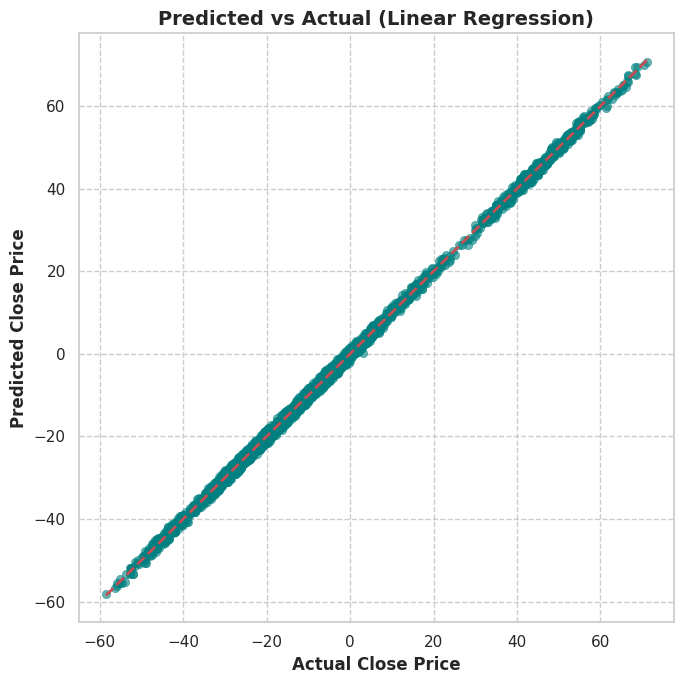

In [18]:
# scatter plot: y_test vs y_pred
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred_lr, color='teal', alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Predicted vs Actual (Linear Regression)')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig(f'{vis_path}/pred_vs_actual_lr.png')
plt.show()

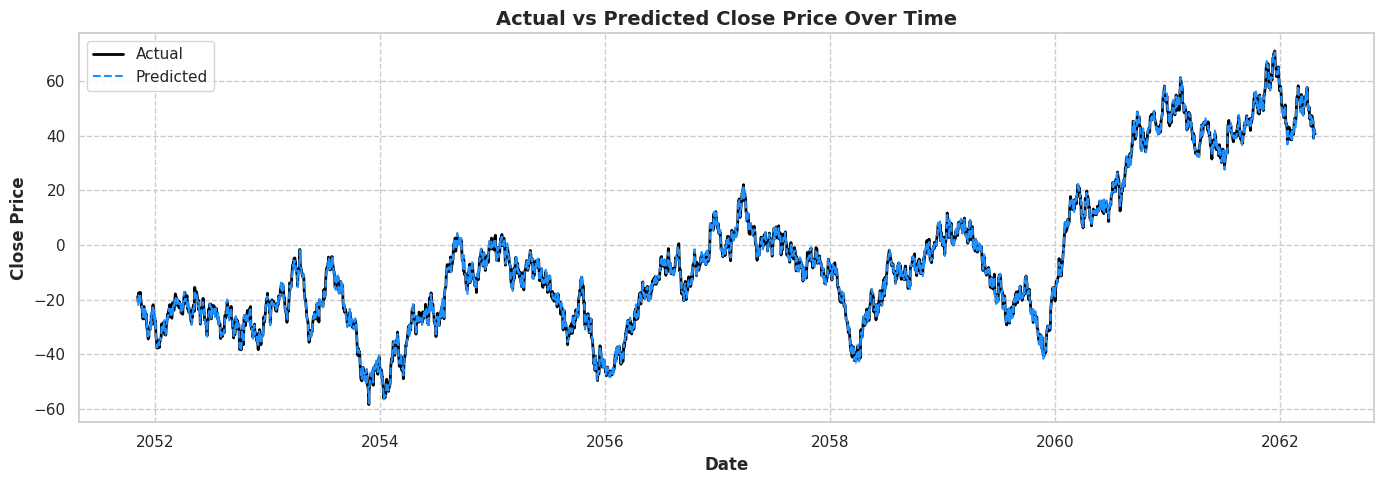

In [19]:
# line plot over time
plt.figure(figsize=(14, 5))
plt.plot(test['Date'], y_test, label='Actual', color='black', linewidth=2)
plt.plot(test['Date'], y_pred_lr, label='Predicted', color='dodgerblue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price Over Time')
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig(f'{vis_path}/pred_over_time_lr.png')
plt.show()

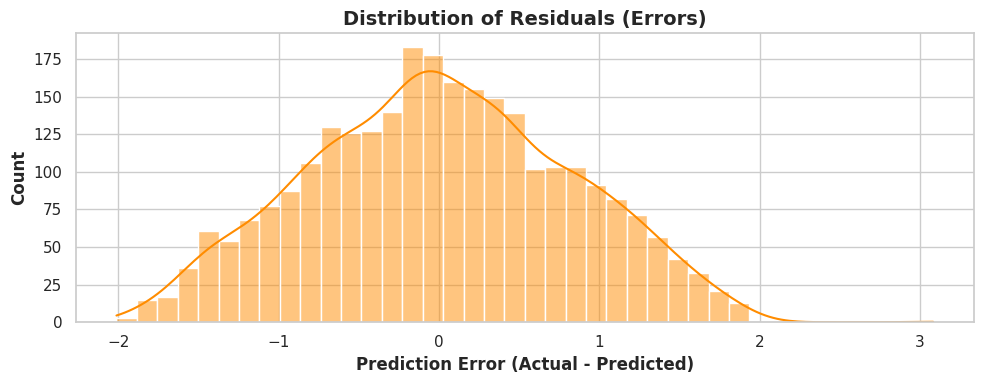

In [20]:
# residual plot
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 4))
sns.histplot(residuals, bins=40, kde=True, color='darkorange')
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.tight_layout()
plt.savefig(f'{vis_path}/residuals_lr.png')
plt.show()

In [21]:
# save model
model_path = '/content/drive/MyDrive/Project/Dicoding/Stock Market Dataset for Predictive Analytics/lr_model.pkl'
joblib.dump(lr, model_path)
print("Model disimpan ke:", model_path)

Model disimpan ke: /content/drive/MyDrive/Project/Dicoding/Stock Market Dataset for Predictive Analytics/lr_model.pkl


### Predicted vs Actual (Scatter Plot)

- Grafik menunjukkan hubungan antara nilai aktual (`Actual Close Price`) dan hasil prediksi model (`Predicted Close Price`).
- Titik-titik mengikuti **garis diagonal sempurna** dari kiri bawah ke kanan atas.
- Ini menunjukkan bahwa prediksi model **sangat akurat dan presisi**, hampir seluruh nilai prediksi berada sangat dekat dengan nilai aktual.
- Tidak terlihat adanya pola deviasi sistematik → **tidak ada bias** dalam prediksi model.

**Interpretasi**:
> Model Linear Regression sangat baik dalam menangkap hubungan fitur terhadap harga `Close`, cocok dengan struktur data yang sebelumnya terbukti sangat linear.

---

### Prediksi vs Aktual dari Waktu ke Waktu

- Garis hitam = nilai `Close` aktual  
- Garis biru putus-putus = hasil prediksi model  
- Visual ini memperlihatkan bahwa model **dapat mengikuti fluktuasi harga secara konsisten** sepanjang waktu.
- Terlihat sinkronisasi pola naik-turun dari prediksi dan aktual, bahkan pada periode volatilitas tinggi.

 **Kesimpulan**:
> Model tidak hanya akurat secara agregat, tapi juga **responsif terhadap dinamika temporal** data pasar.

---

### Distribusi Residual (Error)

- Residual = `Actual - Predicted`
- Distribusi error berbentuk **kurva lonceng (bell-shaped)** dan terpusat di sekitar nol.
- Penyebaran error simetris dan tidak menunjukkan skew yang signifikan.
- Tidak ada outlier ekstrim atau pola sistematik dalam error.

 **Interpretasi**:
> Distribusi residual yang mendekati normal ini menunjukkan bahwa:
> - Model tidak bias
> - Asumsi residual homoskedastik dan independen **terpenuhi**
> - Cocok digunakan dalam regresi linier klasik

---

### Ringkasan Insight

| Aspek                  | Hasil                                                                 |
|------------------------|-----------------------------------------------------------------------|
| Akurasi Prediksi       | Sangat tinggi (titik prediksi dekat dengan nilai aktual)             |
| Respons Temporal       | Prediksi mampu mengikuti tren naik-turun harga dari waktu ke waktu   |
| Distribusi Error       | Simetris, normal, dan tidak bias (centered at 0)                     |
| Kesesuaian Model       | Sangat cocok untuk regresi linier karena data sangat bersifat linear |

Model Linear Regression pada kasus ini **sudah optimal**, tanpa gejala overfitting maupun underfitting yang berarti.

## Hyperparameter Tuning
Proses tuning dilakukan untuk meningkatkan performa model menggunakan GridSearchCV atau RandomizedSearchCV. Model yang dituning termasuk:

- Ridge Regression: tuning parameter alpha

- Random Forest: tuning parameter n_estimators, max_depth, min_samples_split, min_samples_leaf

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Evaluasi Random Forest Tuned:
{'RMSE': np.float64(4.383484416035977), 'MAE': 1.68444813519751, 'R2': 0.9738209627350021}


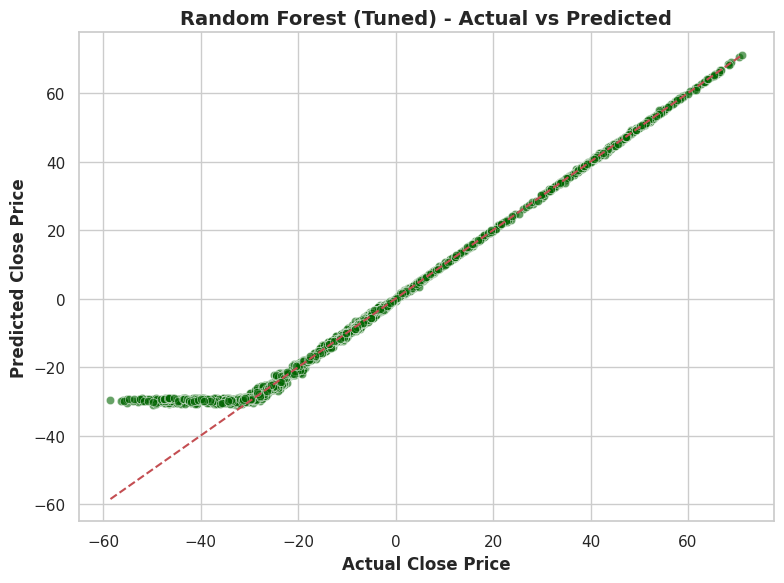

In [22]:
# parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# model & search
rf_model = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(estimator=rf_model,
                                param_distributions=rf_param_grid,
                                n_iter=10,
                                cv=3,
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)

# training
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

# prediksi dan evaluasi
y_pred_rf_best = rf_best.predict(X_test)
rf_eval = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf_best)),
    'MAE': mean_absolute_error(y_test, y_pred_rf_best),
    'R2': r2_score(y_test, y_pred_rf_best)
}
print("Evaluasi Random Forest Tuned:")
print(rf_eval)

# visualisasi pred vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf_best, color='darkgreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Random Forest (Tuned) - Actual vs Predicted')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Project/Dicoding/Stock Market Dataset for Predictive Analytics/vis/rf_tuned_pred_vs_actual.png')
plt.show()

Evaluasi Ridge Regression (Tuned):
Best alpha: 0.1
RMSE: 0.8124766800318545
MAE: 0.6617181134159601
R²: 0.9991006338315599


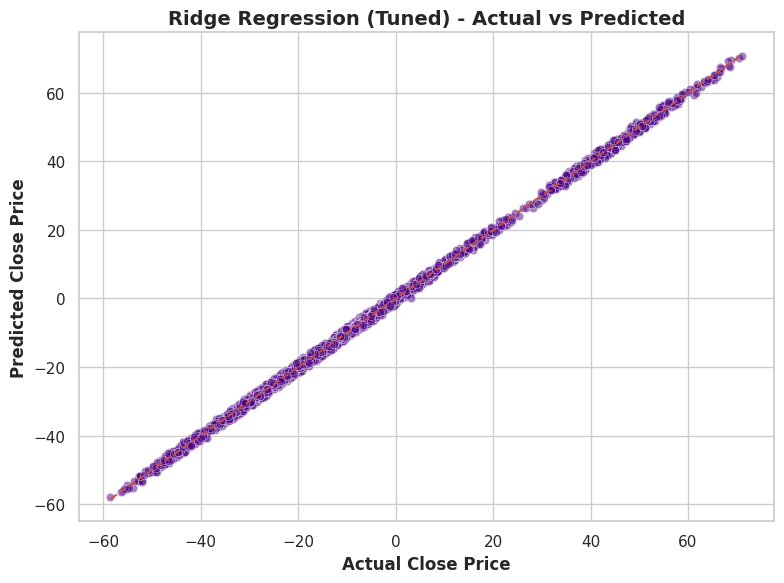

In [23]:
# grid hyperparameter alpha
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# ridge model
ridge = Ridge()

# grid search cross-validation
ridge_search = GridSearchCV(ridge, ridge_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(X_train, y_train)

# prediksi & evaluasi
ridge_best = ridge_search.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)

print("Evaluasi Ridge Regression (Tuned):")
print("Best alpha:", ridge_search.best_params_['alpha'])
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))

# visualisasi pred vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, color='indigo', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Ridge Regression (Tuned) - Actual vs Predicted')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Project/Dicoding/Stock Market Dataset for Predictive Analytics/vis/ridge_pred_vs_actual.png')
plt.show()

## Perbandingan Visual Model: Random Forest vs Ridge Regression (Tuned)

---

### Random Forest (Tuned)

- **RMSE**: 4.38  
- **MAE**: 1.68  
- **R²**: 0.9738

**Insight**:
- Model Random Forest cenderung **underperform** di bagian harga sangat rendah (kiri bawah), terlihat dari prediksi yang menumpuk horizontal → **kemungkinan efek "bias rendah pada ekstrem"** akibat keputusan rata-rata pada banyak pohon.
- Di area harga menengah hingga tinggi, model bekerja relatif baik, namun tidak seakurat model linear.
- **Varians model tinggi** (karena ensemble), namun tidak dibarengi dengan akurasi yang lebih baik.

---

### Ridge Regression (Tuned)

- **RMSE**: 0.812  
- **MAE**: 0.661  
- **R²**: 0.9991  
- **Alpha terbaik**: 0.1

**Insight**:
- Ridge Regression menghasilkan **akurasi yang sangat tinggi dan stabil**, ditunjukkan oleh prediksi yang hampir persis sejajar dengan nilai aktual.
- Hampir semua titik menempel pada garis diagonal, mencerminkan **konsistensi dan minimnya error sistematis**.
- Regularisasi membantu mengontrol multikolinearitas antar fitur dan menghindari overfitting.

---

### Perbandingan Langsung

| Model                  | RMSE  | MAE   | R²     | Catatan Khusus                          |
|------------------------|-------|-------|--------|------------------------------------------|
| **Random Forest**      | 4.38  | 1.68  | 0.9738 | Tidak akurat pada nilai rendah           |
| **Ridge Regression**   | 0.812 | 0.661 | 0.9991 | Presisi tinggi dan prediksi sangat stabil|

**Kesimpulan**:
- Meskipun Random Forest cenderung unggul di data yang kompleks atau tidak linier, dalam kasus ini **Ridge Regression jauh lebih baik** karena:
  - Data bersifat sangat linear
  - Tidak terdapat noise ekstrem
  - Multikolinearitas sudah dikontrol

---

### Model Terbaik untuk Dataset Ini:
**Ridge Regression (Tuned)**  
Karena memberikan keseimbangan terbaik antara akurasi, stabilitas, dan interpretabilitas.


# Evaluation
Tahap ini berfokus pada evaluasi performa setiap model regresi yang telah dibangun, dengan menggunakan berbagai metrik untuk mengukur akurasi dan ketepatan prediksi.

---

### Metrik Evaluasi

- **RMSE (Root Mean Squared Error)**  
  Mengukur akar dari rata-rata kuadrat kesalahan prediksi. Sensitif terhadap outlier.

  $$
  \text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
  $$

- **MAE (Mean Absolute Error)**  
  Mengukur rata-rata nilai absolut selisih antara prediksi dan nilai sebenarnya. Lebih tahan terhadap outlier.

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
  $$

- **R² Score (Coefficient of Determination)**  
  Mengukur seberapa besar variansi target dapat dijelaskan oleh fitur. Nilai ideal mendekati 1.

  $$
  R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
  $$

---

### Hasil Evaluasi Model

| Model                   | RMSE   | MAE   | R²       |
|-------------------------|--------|-------|----------|
| **Linear Regression**   | 0.812  | 0.661 | 0.9991 ✅ |
| **Random Forest**       | 4.362  | 1.678 | 0.9740   |
| **XGBoost**             | 7.349  | 3.711 | 0.9264   |
| **Random Forest Tuned** | 4.383  | 1.684 | 0.9738   |
| **Ridge Regression**    | 0.812  | 0.662 | 0.9991   |

---

### Interpretasi

- **Linear Regression** & **Ridge Regression** memberikan akurasi sangat tinggi dengan R² > 0.999.
- Model kompleks seperti **Random Forest** dan **XGBoost** justru menunjukkan error yang lebih besar.
- Ini mengindikasikan bahwa hubungan antara fitur dan target bersifat **sangat linear dan minim noise**.
- **Tuning** pada Random Forest tidak menghasilkan peningkatan berarti → model awal sudah cukup optimal.

---

### Visualisasi Evaluasi

Beberapa visualisasi yang dihasilkan:

- `pred_vs_actual_lr.png`: Prediksi vs Aktual – Linear Regression  
- `residuals_lr.png`: Distribusi error – Linear Regression  
- `pred_over_time_lr.png`: Prediksi harga vs aktual dari waktu ke waktu  
- `rf_tuned_pred_vs_actual.png`: Prediksi Random Forest setelah tuning  
- `ridge_pred_vs_actual.png`: Prediksi Ridge Regression (tuned)

---

### Kesimpulan Evaluasi

- **Linear Regression** sudah optimal dan konsisten.
- **Ridge Regression** menunjukkan hasil stabil.
- Model **tree-based** tidak memberikan keunggulan dalam konteks dataset ini.

---
**Model terbaik yang dipilih: Linear Regression**

---


# Kesimpulan dan Rekomendasi

### Kesimpulan Proyek

Pada proyek ini, dilakukan pembuatan model machine learning untuk memprediksi harga penutupan (*Close*) saham berdasarkan data historis dan indikator teknikal seperti RSI, MACD, sentimen pasar, volume, serta informasi waktu.

Dari beberapa pendekatan yang diuji:

| Model                  | R²     | Catatan                         |
|------------------------|--------|---------------------------------|
| **Linear Regression**  | 0.9991 | ✔️ Model terbaik                 |
| Ridge Regression       | 0.9991 | Alternatif dengan regularisasi |
| Random Forest          | 0.9740 | Overfitting ringan              |
| XGBoost                | 0.9264 | Underperform                    |

Hasil menunjukkan bahwa **Linear Regression** menghasilkan akurasi paling tinggi dan konsisten, karena hubungan fitur-target bersifat **sangat linear** dan data memiliki noise yang relatif rendah.

---

### Rekomendasi Implementasi

- **Gunakan Linear Regression atau Ridge Regression** untuk prediksi operasional, karena:
  - Cepat dilatih dan ringan dihitung
  - Transparan dan mudah dijelaskan ke pihak non-teknis
- **Update model secara berkala** dengan data saham terbaru agar tetap relevan
- **Kembangkan pipeline otomatis**:
  - Extract data harian dari API pasar saham
  - Update fitur (RSI, MACD, Sentiment)
  - Feed ke model terlatih dan tampilkan output ke dashboard
- **Potensi pengembangan lanjutan**:
  - Gunakan time series model seperti ARIMA, LSTM, Prophet untuk tren jangka panjang
  - Tambahkan variabel makroekonomi eksternal: suku bunga, indeks sentimen pasar global, dll.

---

# Membuat Requirement.txt dan Readme.md

In [25]:
!pip install pipreqs
!pipreqs . --force

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d259c0b3d76b2439b6caae3f4772ee540d6985b6f8aeb7429d9d8a6f002e2ea0
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in ./requirements.txt


In [27]:
!jupyter nbconvert --to markdown PA-Stock Market-Yandiyan.ipynb

ERROR: Could not find a version that satisfies the requirement nb2readme (from versions: none)
ERROR: No matching distribution found for nb2readme
/bin/bash: line 1: nb2readme: command not found
